In [269]:
import pandas as pd
import seaborn as sns
import numpy as np
train_df=pd.read_csv('train.csv') #we use this dataset to train our model
test_df=pd.read_csv('test.csv') #we will use this data set later to validate our model

#Combined both training and test
Combined_df=pd.concat([train_df,test_df])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [270]:
Combined_df.shape

(258210, 15)

In [271]:
train_df.shape

(175000, 14)

In [272]:
Combined_df.info() #check the column data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258210 entries, 0 to 83209
Data columns (total 15 columns):
country                  258146 non-null object
description              258210 non-null object
designation              181120 non-null object
id                       258210 non-null int64
index                    83210 non-null float64
points                   258210 non-null float64
price                    175000 non-null float64
province                 258146 non-null object
region_1                 215793 non-null object
region_2                 110996 non-null object
taster_name              96479 non-null object
taster_twitter_handle    91559 non-null object
title                    120975 non-null object
variety                  258209 non-null object
winery                   258210 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [273]:
train_df.nunique()

country                      45
description              123811
designation               37931
points                   175000
price                       387
province                    468
region_1                   1278
region_2                     18
taster_name                  19
taster_twitter_handle        15
title                     77411
variety                     706
winery                    16968
id                       124675
dtype: int64

In [274]:
train_df.describe()

,points,price,id
count,175000.000000,175000.000000,175000.000000
mean,88.083987,34.304400,70684.047240
std,3.157001,38.398146,41341.638798
min,79.636128,4.000000,1.000000
25%,85.971283,16.000000,35020.000000
50%,87.981631,25.000000,70256.500000
75%,90.085631,40.000000,105550.250000
max,100.220603,2500.000000,150929.000000


## EDA

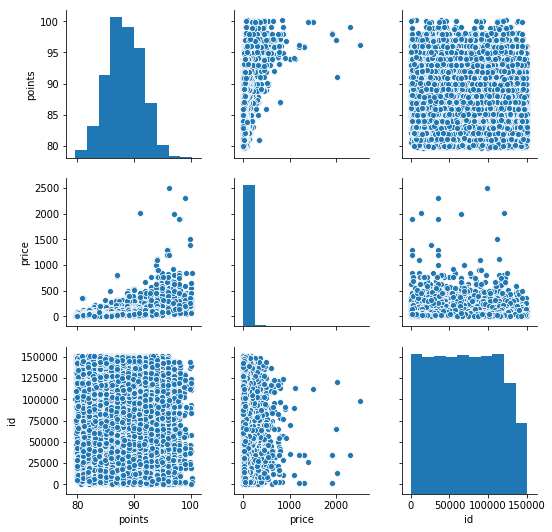

In [275]:
sns.pairplot(train_df) #see the correlation of our features.---This guides you whether there exist linear relationships or not

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


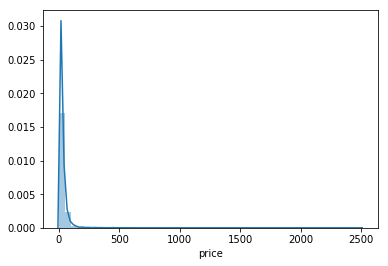

In [258]:
sns.distplot(train_df['price'])

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


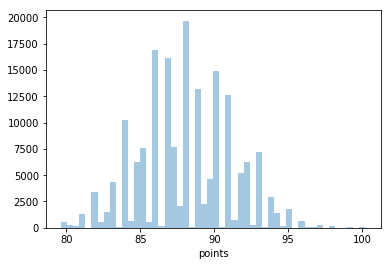

In [259]:
sns.distplot(train_df['points'],kde=False)

In [276]:
# Convert variables to categories with label encoding
#Combined_df["country"] = Combined_df["country"].astype('category').cat.codes
Combined_df["designation"] = Combined_df["designation"].astype('category').cat.codes
Combined_df["province"] = Combined_df["province"].astype('category').cat.codes
Combined_df["region_1"] = Combined_df["region_1"].astype('category').cat.codes
#Combined_df["region_2"] = Combined_df["region_2"].astype('category').cat.codes
#Combined_df["taster_name"] = Combined_df["taster_name"].astype('category').cat.codes
#Combined_df["taster_twitter_handle"] = Combined_df["taster_twitter_handle"].astype('category').cat.codes
Combined_df["title"] = Combined_df["title"].astype('category').cat.codes
Combined_df["variety"] = Combined_df["variety"].astype('category').cat.codes
Combined_df["winery"] = Combined_df["winery"].astype('category').cat.codes

In [277]:
#Applying one hot encoding in some variables
Combined_df = pd.get_dummies(Combined_df, columns = ['country','region_2','taster_name','taster_twitter_handle'], drop_first = True)

In [278]:
Combined_df.shape

(258210, 107)

# Split the data

In [279]:
train_df_new=Combined_df.iloc[0:len(train_df),]
test_df_new=Combined_df.iloc[len(train_df):,]

In [280]:
#X=train_df_new[['country', 'designation', 'points', 'province',
       #'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       #'variety', 'winery']]
y=train_df_new[['price']]
X=train_df_new.drop(['description', 'price','id','index' ],axis=1)

In [281]:
X.shape

(175000, 103)

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling


In [283]:
from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Training the model

In [286]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=60, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [287]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.184183333333335
Mean Squared Error: 491.04932323015873
Root Mean Squared Error: 22.15963274131949


## Validate model with Test data

In [240]:
#extract columns from test data
#x_test=test_df_new[['country', 'designation', 'points', 'province',
       #'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
      # 'variety', 'winery']]
x_test=test_df_new.drop(['description', 'price','id','index' ],axis=1)

In [241]:
#Scale test set
#x_test = sc.transform(x_test)

In [242]:
predictions=regressor.predict(x_test)

In [243]:
np.mean(predictions)

34.66753715498938

In [244]:
train_df['price'].mean()

34.3044

In [248]:
predictions_df=pd.DataFrame(data={'id': range(len(x_test)), 'price': predictions}) #create dataframe for predictions
predictions_df.to_csv('predictions.csv',index=False)

In [249]:
predictions_df.head()

,id,price
0,0,77.383333
1,1,52.716667
2,2,33.683333
3,3,28.700000
4,4,12.700000
